Heart Disease Prediction Using Logistic Regression

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.mlab as mlab
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [4]:
df = pd.read_csv('sampledata/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [30]:
df.currentSmoker.nunique()

2

In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

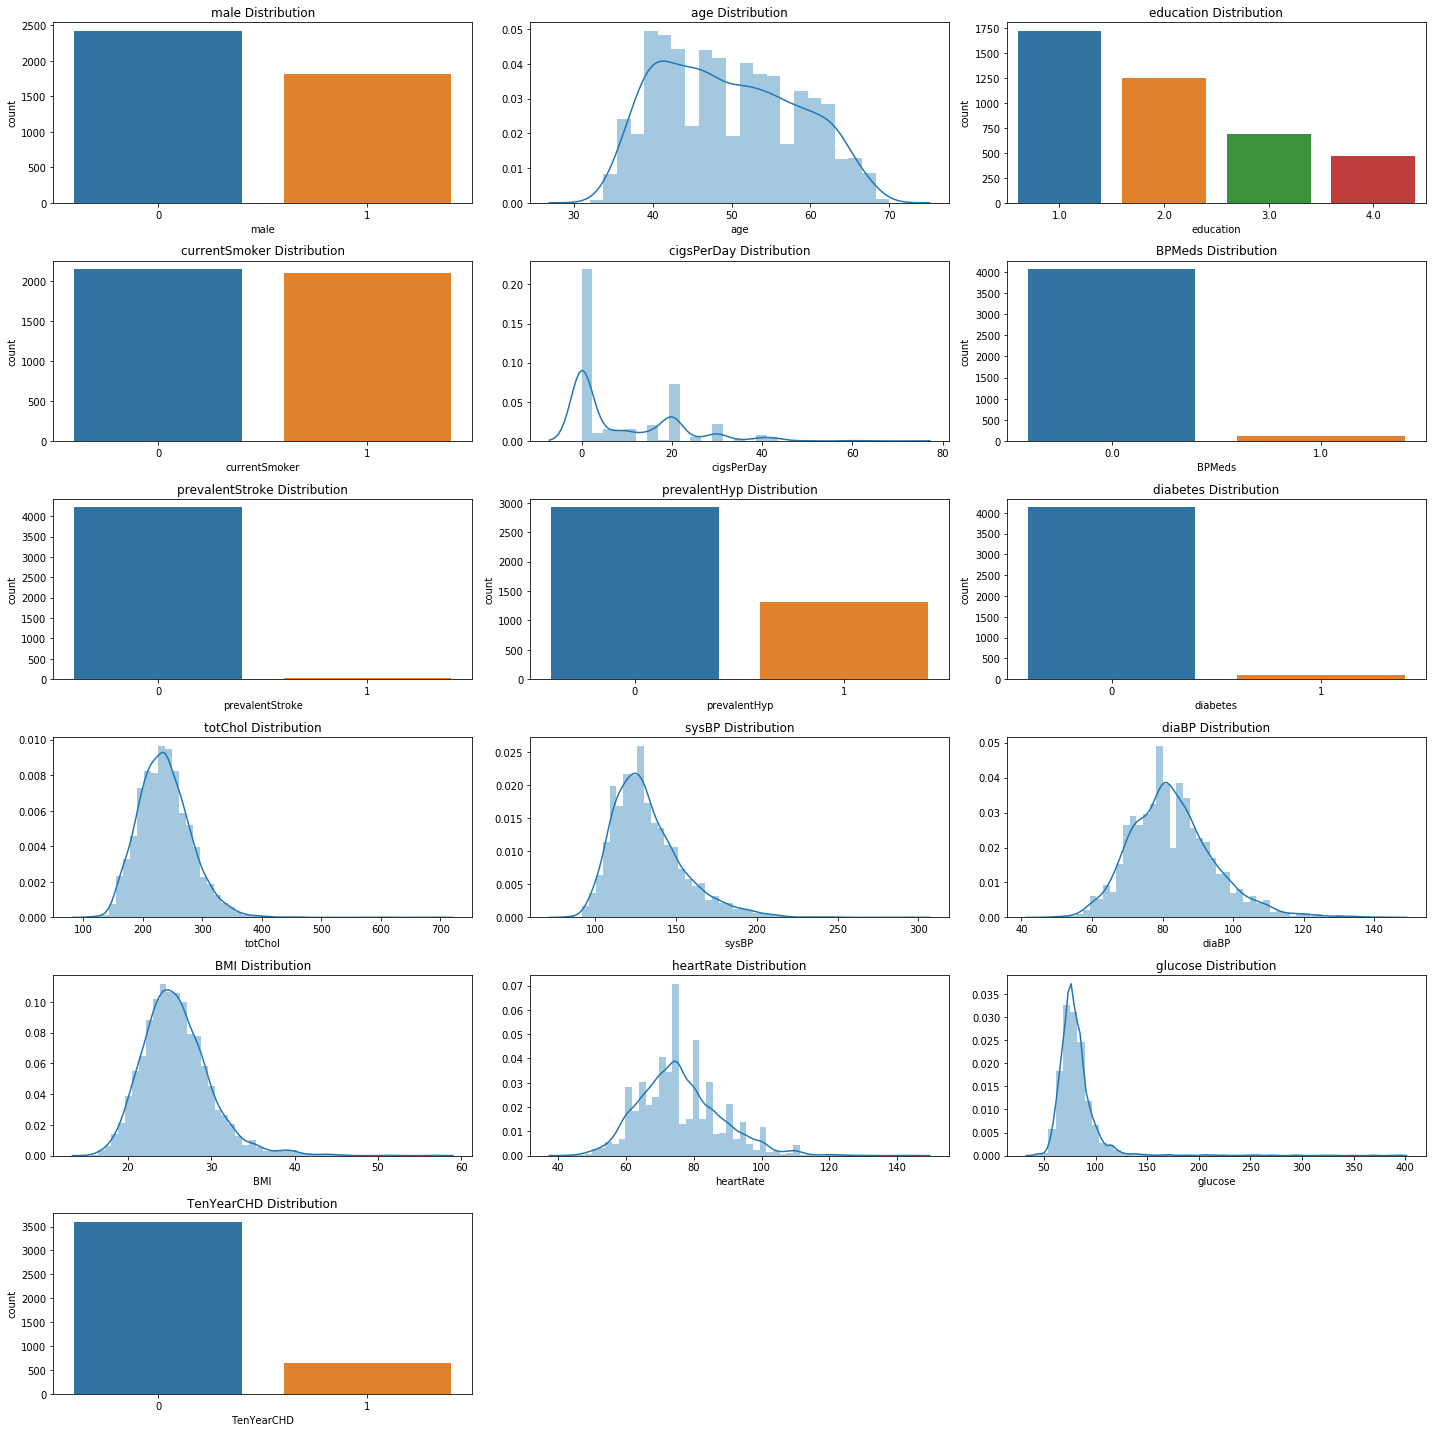

In [34]:
def plotDist(df, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        if df[feature].nunique() < 5:
            sns.countplot(df[feature], ax=ax)
        else:
            sns.distplot(df[feature].dropna(), ax=ax)
        ax.set_title(feature+' Distribution')
    fig.tight_layout()
    plt.show()
plotDist(df, df.columns, 6, 3)

In [39]:
df.profile_report()

In [40]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Multi Colinearity check: Taking a closer look at the correlation plot. As a rule of thumb, I consider higher than +/- 0.75 to be of high correlation.  
* cigsPerDay is highly correlated with currentSmoker
* sysBP is highly correlated with diaBP

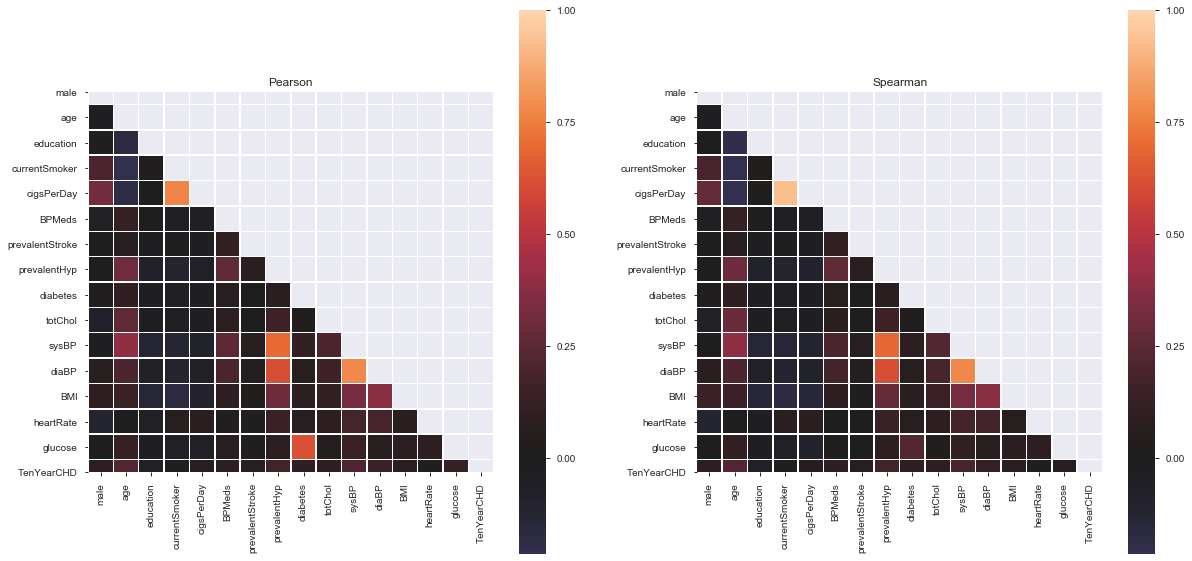

In [54]:
corr_pearson = df.corr()
corr_spearman = df.corr(method='spearman')
# Generate a mask for the upper right triangle of the square - one half is enough to convey the correlation 
## between the predictors
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot 
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Pearson')
sns.heatmap(corr_pearson, mask=mask, center=0, square=True, linewidths=.5, ax=ax)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Spearman')
sns.heatmap(corr_spearman, mask=mask, center=0, square=True, linewidths=.5, ax=ax)

plt.show()

In [43]:
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


Bi-variate analysis - Relation of each predictor with Target Variable (TenYearCHD) - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
* Prevalent Hypertension factor seems to show a noticeable difference, where those with a risk of heart disease tend to have higher average Hypertension prevalence.
* No other significant difference it seems. 

In [47]:
df.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410734,48.762514,2.002851,0.489989,8.713925,0.023354,0.003893,0.275862,0.019188,235.147398,130.337319,82.166435,25.671659,75.762514,80.679251
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


In [48]:
df.groupby('TenYearCHD').median()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0,48,2.0,0,0.0,0.0,0,0,0,232.0,127.0,81.0,25.250,75.0,78.0
1,1,55,1.0,1,2.5,0.0,0,1,0,241.0,139.0,85.5,26.155,75.0,79.0


In [49]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Box Plots

In [68]:
df.columns[:-1]

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

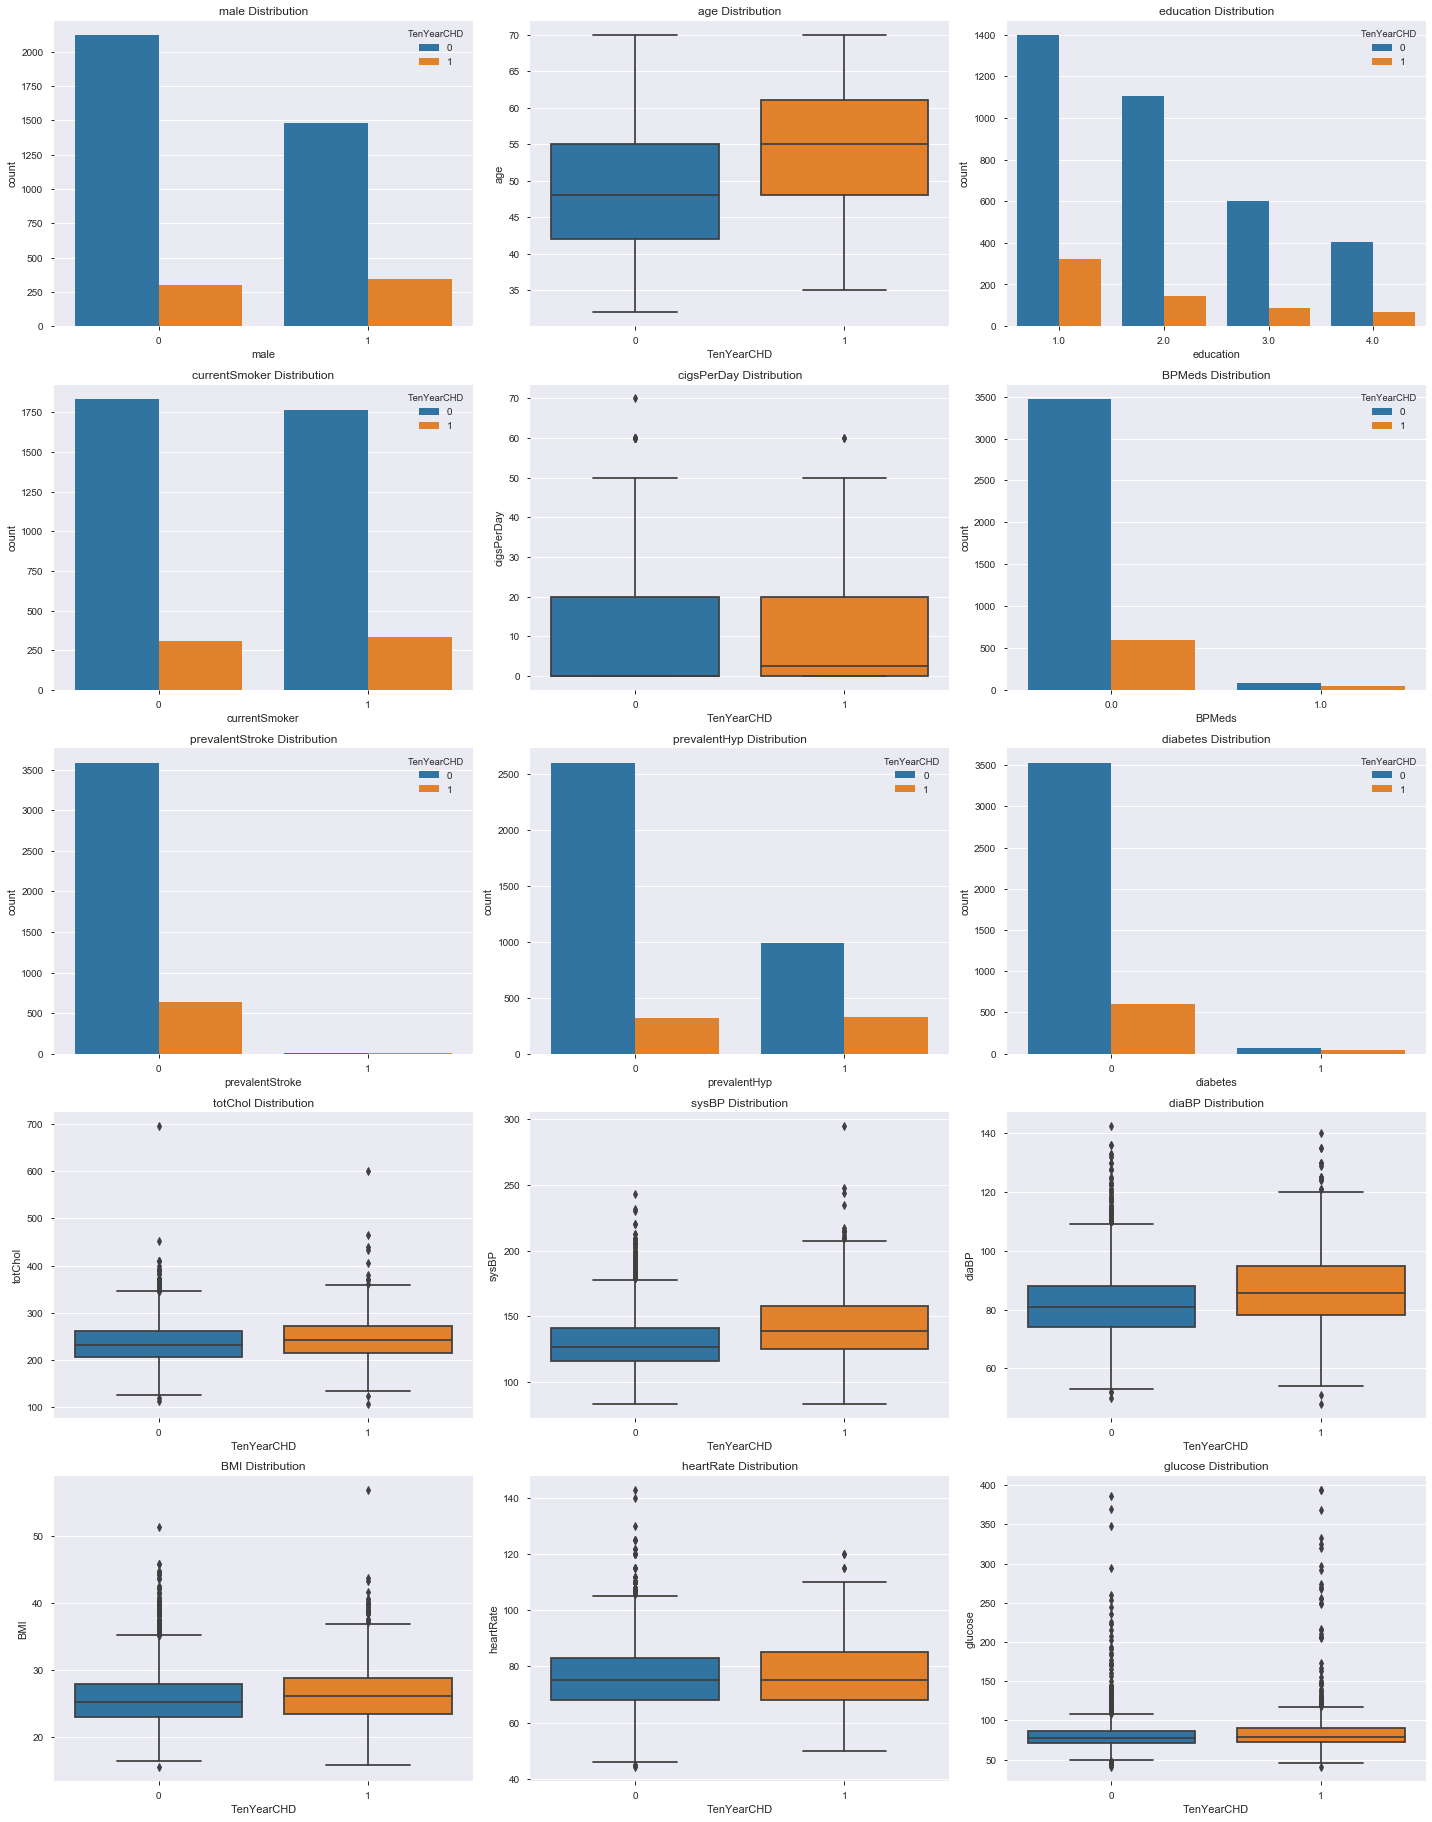

In [65]:
def plotBox(df, features, target, rows, cols):
    fig = plt.figure(figsize=(20,30))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        if df[feature].nunique() < 5:
            sns.countplot(df[feature], hue=df[target], ax=ax)
        else:
            sns.boxplot(x=target, y=feature, data=df, orient="v", ax=ax)
        ax.set_title(feature+' Distribution')
    fig.tight_layout()
    plt.show()
plotBox(df, df.columns[:-1], 'TenYearCHD', 6, 3)

Modeling and Feature Implementation

In [192]:
def dataSplit(df, target, standardize=False):
    df = df.dropna()
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    
    if standardize:
        scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        X_train = pd.DataFrame(X_train, columns=df.drop('TenYearCHD', axis=1).columns)
        y_train = pd.DataFrame(y_train, columns=[target]).reset_index(drop=True)
    return(X_train, X_test, y_train, y_test)

In [202]:
X_train, X_test, y_train, y_test = dataSplit(df, 'TenYearCHD', False)

logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled,y_test)))

Training set score: 0.854
Test set score: 0.850


Interpreting results

In [203]:
from statsmodels.tools import add_constant

df_X = add_constant(X_train)

logit_model = sm.Logit(y_train, df_X)
res = logit_model.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.375649
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.119     
Dependent Variable: TenYearCHD       AIC:              2092.8102 
Date:               2019-11-03 17:49 BIC:              2187.4792 
No. Observations:   2743             Log-Likelihood:   -1030.4   
Df Model:           15               LL-Null:          -1169.1   
Df Residuals:       2727             LLR p-value:      2.8068e-50
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const           -9.0053   0.8356 -10.7768 0.0000 -10.6431 -7.3675
male             0.5379   0.1266   4.2501 0.0000   0.2899  0.7860


Well, the model did converge without any problems, but now it's time to do feature selection. A lot of ways to do this. 
Backward Elimination -> Eliminate features with largest P-value until all P-values are below 0.05
RFE (Recursive Feature Elimination)

In [204]:
cols = X_train.columns
cols

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [205]:
def backwardElimination(df, y, cols):
    while len(cols) > 0:
        model = sm.Logit(y, df[cols])
        res = model.fit(disp=0)
        maxP = round(res.pvalues,3).nlargest(1)
        if maxP[0] < 0.05:
            return res
            break
        else:
            cols = cols.drop(maxP.index)
            print("Eliminating: "+str(maxP))
result = backwardElimination(df_X, y_train, cols)

Eliminating: currentSmoker    0.99
dtype: float64
Eliminating: glucose    0.684
dtype: float64
Eliminating: totChol    0.42
dtype: float64
Eliminating: prevalentStroke    0.382
dtype: float64
Eliminating: BPMeds    0.09
dtype: float64


In [206]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.062     
Dependent Variable: TenYearCHD       AIC:              2213.1611 
Date:               2019-11-03 17:50 BIC:              2272.3291 
No. Observations:   2743             Log-Likelihood:   -1096.6   
Df Model:           9                LL-Null:          -1169.1   
Df Residuals:       2733             LLR p-value:      9.6160e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
male           0.3866    0.1203   3.2126  0.0013   0.1507   0.6225
age            0.0280    0.0064   4.3684  0.0000   0.0155   0.0406
education     -0.2373    0.0551  -4.3105  0.0000  -0.3452  -0.1294
cigsPerDay     0.0130    0.0048   2.7018  0.0069   0.0036   0.0224
prevalentHyp   0.8840    0.1391   6.3550  0.0000   0.6114   1.1566
diabetes       0.9156    0.2607   3.5120  0.0004   0.4046   1.4265
sysBP          0.0129    0.0043   2.9949  0.0027   0.0045   0.0214
diaBP         -0.0251    0.0070  -3.5824  0.0003  -0.0388  -0.0114
BMI           -0.0504    0.0139  -3.6389  0.0003  -0.0776  -0.0233
heartRate     -0.0223    0.0044  -5.0901  0.0000  -0.0308  -0.0137
=================================================================

"""

In [207]:
df_clean = df.copy().dropna()
cols_clean = result.params.index
model = sm.Logit(df_clean.TenYearCHD, df_clean[cols_clean])
res = model.fit(disp=0)

params = np.exp(res.params)
conf = np.exp(res.conf_int())
conf['OR'] = params
pvalue = round(res.pvalues, 3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
conf

,CI 95%(2.5%),CI 95%(97.5%),Odds Ratio,pvalue
male,1.221551,1.834342,1.496911,0.000
age,1.017262,1.039741,1.028440,0.000
education,0.743586,0.895960,0.816225,0.000
cigsPerDay,1.005645,1.022149,1.013863,0.001
prevalentHyp,2.057194,3.303182,2.606777,0.000
diabetes,1.603648,3.961468,2.520476,0.000
sysBP,1.005977,1.020865,1.013394,0.000
diaBP,0.962096,0.985347,0.973652,0.000
BMI,0.931040,0.976314,0.953408,0.000
heartRate,0.969245,0.983912,0.976551,0.000


* Males have a 49% higher chance of getting diagnosed with heart disease
* We will see 2% increase in the odds of getting diagnosed CDH for a one year increase in age
* Similarly, with every extra cigarette per day one smokes, there is a 2% increase in the odds of CDH


In [129]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

df_rfe = df.dropna()
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(df_rfe.drop('TenYearCHD', axis=1), df_rfe.TenYearCHD)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True  True False False False
 False False False]
[ 3  6  5  4 12  2  1  1  1 13  8 10  7  9 11]
